In [2]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML

# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))

C:\Users\TP\AppData\Local\Temp\ipykernel_13352\4093729654.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 1.1 Describe the dataset

### Load the dataset using pd.read_csv (1 mark)

In [3]:
df = pd.read_csv('data.csv')

C:\Users\TP\AppData\Local\Temp\ipykernel_13352\1507164070.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


### Visualize the head of dataset to describe its properties (1 mark)

In [4]:
#Your code here
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


# 1.2.Normalize and clean the data.

### Calculate the avarage salary using df.assign (1 mark)

In [5]:
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary) / 2)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


### Clean Id column using regex (1 mark)

In [6]:
##Hint replace(to_replace=r'&.*', value='', regex=True)

df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)

### Clearn date using regex (1 mark)

In [7]:
#Your code to clean date
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)

In [8]:
df.head()
df.dtypes

Id                    object
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary           int64
HighestSalary          int64
JobType               object
AverageSalary        float64
dtype: object

### Change type of related columns (1 mark)

In [9]:
# Set column "Id" to type int64
df["Id"] = df["Id"].astype(np.int64)

# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"])
# Data types after data cleaning and conversions
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

In [10]:
#Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

# 1.3. Job metadata

In [11]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

In [12]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,
15.0,62639,62639,59611,62639,38541,24399,38541,38541,62637,56065,62639,62639,56080,"15,000",62639
35.0,23476,23476,22296,23476,16396,9811,16396,16396,23476,22092,23476,23476,22094,"35,000",23476
45.0,34436,34436,32076,34436,21736,13264,21736,21736,34435,33580,34436,34436,33585,"45,000",34436
55.0,27027,27027,25679,27027,16561,10755,16561,16561,27026,26206,27027,27027,26222,"55,000",27027
65.0,28499,28499,27290,28499,18121,11393,18121,18121,28499,27544,28499,28499,27566,"65,000",28499
75.0,28712,28712,27794,28712,17053,10456,17053,17053,28712,27670,28712,28712,27674,"75,000",28712
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27673,27673,27150,27673,17137,10575,17137,17137,27671,26682,27673,27673,26683,"110,000",27673
135.0,24514,24514,24165,24514,14701,9481,14701,14701,24514,23610,24514,24514,23612,"135,000",24514


### Bar chart to display the correlations between “AverageSalary” and the total jobs of each range (2 marks)

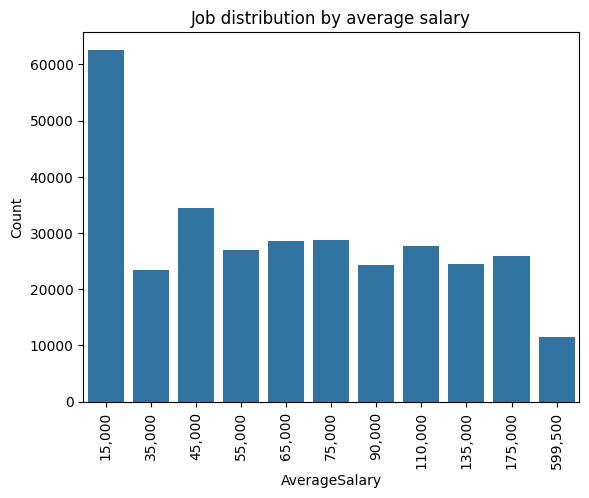

In [13]:
#Your code here
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data=averageSalaryDf, x="AverageSalary", y="Count")
plt.title("Job distribution by average salary")
plt.xticks(rotation = 90)
plt.show()

### Pie chart to display the relationship between job types and the number of jobs (2 marks).

([<matplotlib.patches.Wedge at 0x1f41cbebe60>,
 [Text(1.062053343232389, 0.28643096223855624, 'Casual/Vacation'),
  Text(0.5117383425635564, 0.9737165238149676, 'Contract/Temp'),
  Text(-0.9103279277174624, -0.6174974202518021, 'Full Time'),
  Text(1.0716667562281115, -0.24805314671561382, 'Part Time')],
 [Text(0.5793018235813031, 0.15623507031193976, '8.4%'),
  Text(0.2791300050346671, 0.5311181038990732, '17.8%'),
  Text(-0.4965425060277067, -0.3368167746828011, '66.5%'),
  Text(0.5845455033971516, -0.13530171639033478, '7.2%')])

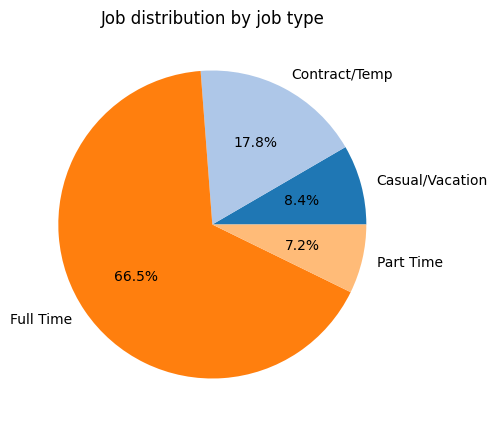

In [14]:
jobTypeDf = df.groupby('JobType').count()
jobTypeDf['JobType'] = jobTypeDf.index
jobTypeDf["Count"] = jobTypeDf["Id"]

plt.figure(figsize=(5,5))
plt.title("Job distribution by job type")
plt.pie(jobTypeDf['Count'], labels=jobTypeDf['JobType'], colors=colors, autopct="%.1f%%")

# Study market by locations

In [20]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.sort_values("Count", ascending=False, inplace=True)
locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
Sydney,60765,60765,58919,60765,53778,60765,60765,60765,57456,60765,60765,57470,60765,Sydney,60765
Melbourne,46690,46690,44941,46690,41297,46690,46690,46686,43821,46690,46690,43827,46690,Melbourne,46690
Brisbane,21466,21466,20612,21466,17412,21466,21466,21466,20214,21466,21466,20221,21466,Brisbane,21466
Perth,13198,13198,12766,13198,10171,13198,13198,13198,12287,13198,13198,12298,13198,Perth,13198
Adelaide,6653,6653,6303,6653,0,6653,6653,6653,6312,6653,6653,6313,6653,Adelaide,6653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yorke Peninsula & Clare Valley,96,96,94,96,0,96,96,96,90,96,96,90,96,Yorke Peninsula & Clare Valley,96
"Tumut, Snowy & Monaro",86,86,85,86,0,86,86,86,83,86,86,83,86,"Tumut, Snowy & Monaro",86
Somerset & Lockyer,65,65,63,65,0,65,65,65,64,65,65,64,65,Somerset & Lockyer,65


### Get top 20 big cities and use bar chart to display market size in each city (2 marks).

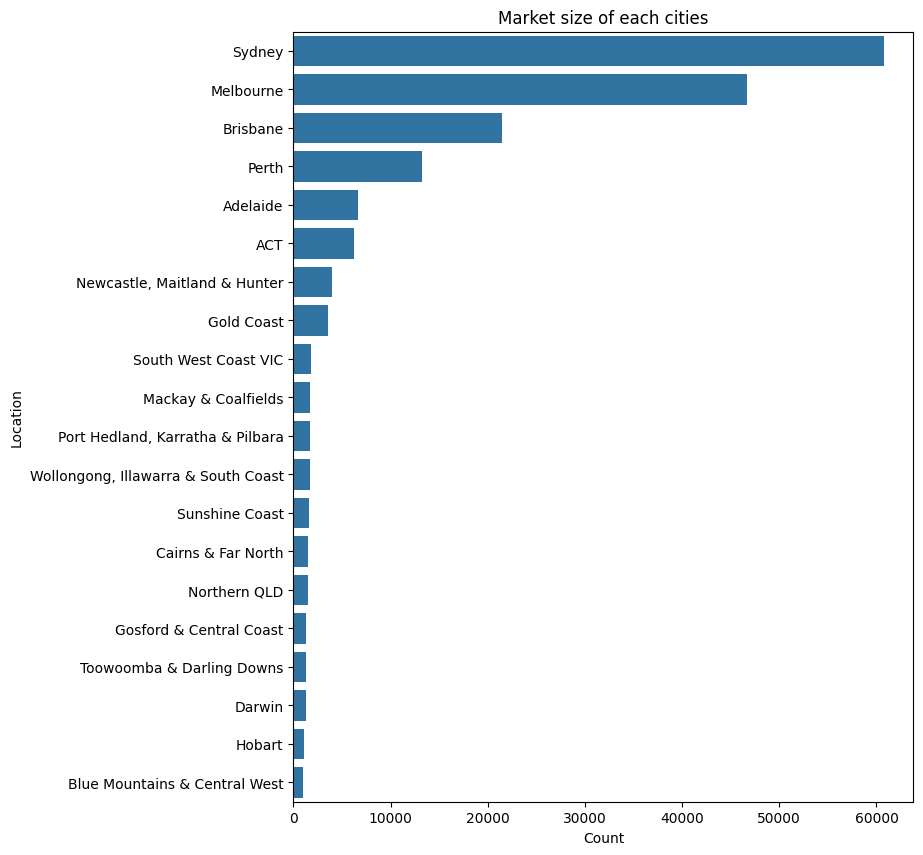

In [31]:
plt.figure(figsize=(8,10))
sns.barplot(data=locationDf, x="Count", y="Location", order=locationDf["Location"][:20])
plt.title("Market size of each cities")
plt.show()

### Visualize the market share between the cities (2 marks)

In [32]:
#Get top 10 big cities
locationDf = locationDf.sort_values(by=["Count"], ascending =False)
locationTop10Df = locationDf[:10].copy()
#others
new_row = pd.DataFrame(data = {
    'Location' : ['Others'],
    'Count' : [locationDf["Count"][10:].sum()]
})
locationTop10Df = pd.concat([locationTop10Df, new_row],sort=False)
locationTop10Df.index = locationTop10Df['Location']
locationTop10Df

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
Sydney,60765.0,60765.0,58919.0,60765.0,53778.0,60765.0,60765.0,60765.0,57456.0,60765.0,60765.0,57470.0,60765.0,Sydney,60765
Melbourne,46690.0,46690.0,44941.0,46690.0,41297.0,46690.0,46690.0,46686.0,43821.0,46690.0,46690.0,43827.0,46690.0,Melbourne,46690
Brisbane,21466.0,21466.0,20612.0,21466.0,17412.0,21466.0,21466.0,21466.0,20214.0,21466.0,21466.0,20221.0,21466.0,Brisbane,21466
Perth,13198.0,13198.0,12766.0,13198.0,10171.0,13198.0,13198.0,13198.0,12287.0,13198.0,13198.0,12298.0,13198.0,Perth,13198
Adelaide,6653.0,6653.0,6303.0,6653.0,0.0,6653.0,6653.0,6653.0,6312.0,6653.0,6653.0,6313.0,6653.0,Adelaide,6653
ACT,6250.0,6250.0,6150.0,6250.0,0.0,6250.0,6250.0,6250.0,5805.0,6250.0,6250.0,5807.0,6250.0,ACT,6250
"Newcastle, Maitland & Hunter",3958.0,3958.0,3824.0,3958.0,0.0,3958.0,3958.0,3958.0,3721.0,3958.0,3958.0,3722.0,3958.0,"Newcastle, Maitland & Hunter",3958
Gold Coast,3588.0,3588.0,3347.0,3588.0,0.0,3588.0,3588.0,3588.0,3386.0,3588.0,3588.0,3386.0,3588.0,Gold Coast,3588
South West Coast VIC,1790.0,1790.0,1619.0,1790.0,0.0,1790.0,1790.0,1790.0,1673.0,1790.0,1790.0,1681.0,1790.0,South West Coast VIC,1790


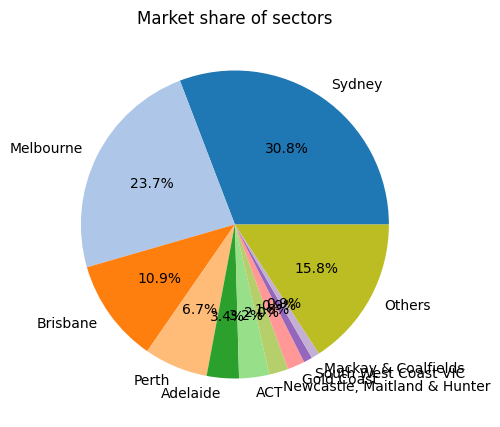

In [33]:
plt.figure(figsize=(5,5))
plt.title("Market share of sectors")
plt.pie(locationTop10Df['Count'], labels=locationTop10Df['Location'], colors=colors, autopct="%.1f%%")
plt.show()

### Visualize the salary distribution in top biggest cities (2 marks)

C:\Users\TP\AppData\Local\Temp\ipykernel_13352\272649044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


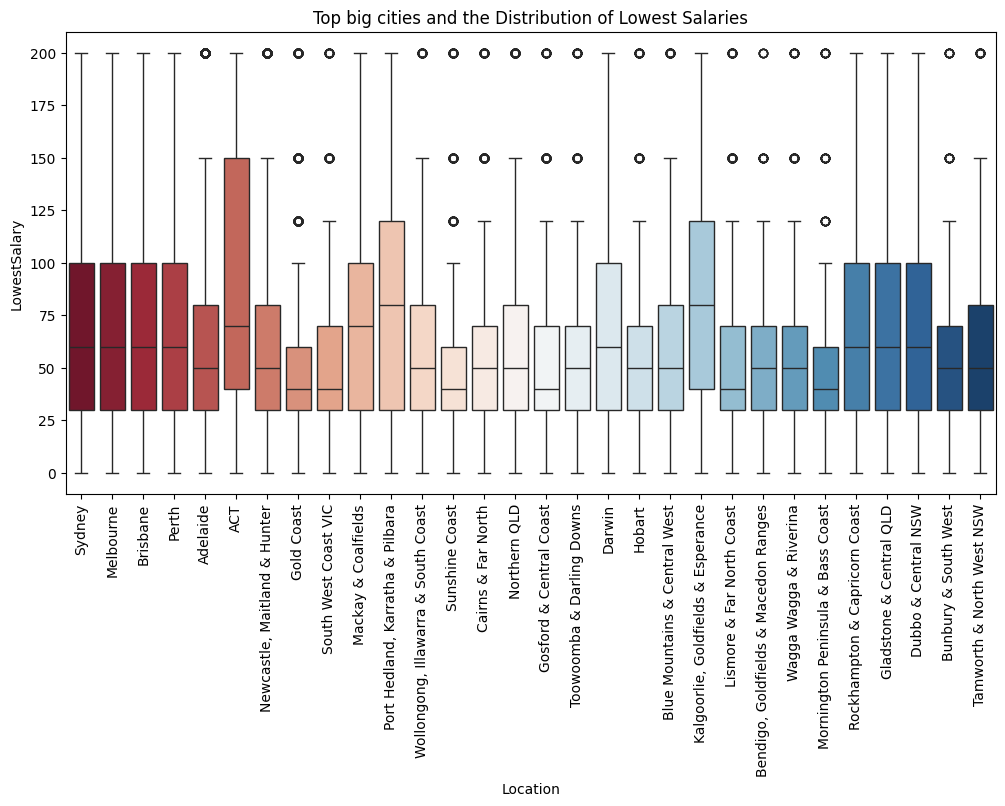

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x="Location",
    y="LowestSalary",
    order=locationDf["Location"][:30],
    palette=sns.color_palette("RdBu", n_colors=30)
)
plt.title("Top big cities and the Distribution of Lowest Salaries")
plt.xticks(rotation=90)
plt.show()

# 1.5 Study by sectors

### The number of postings for each sector. (2 marks)

C:\Users\TP\AppData\Local\Temp\ipykernel_13352\175855497.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=classificationDf, x="Count", y="Classification", palette="Greens_r")


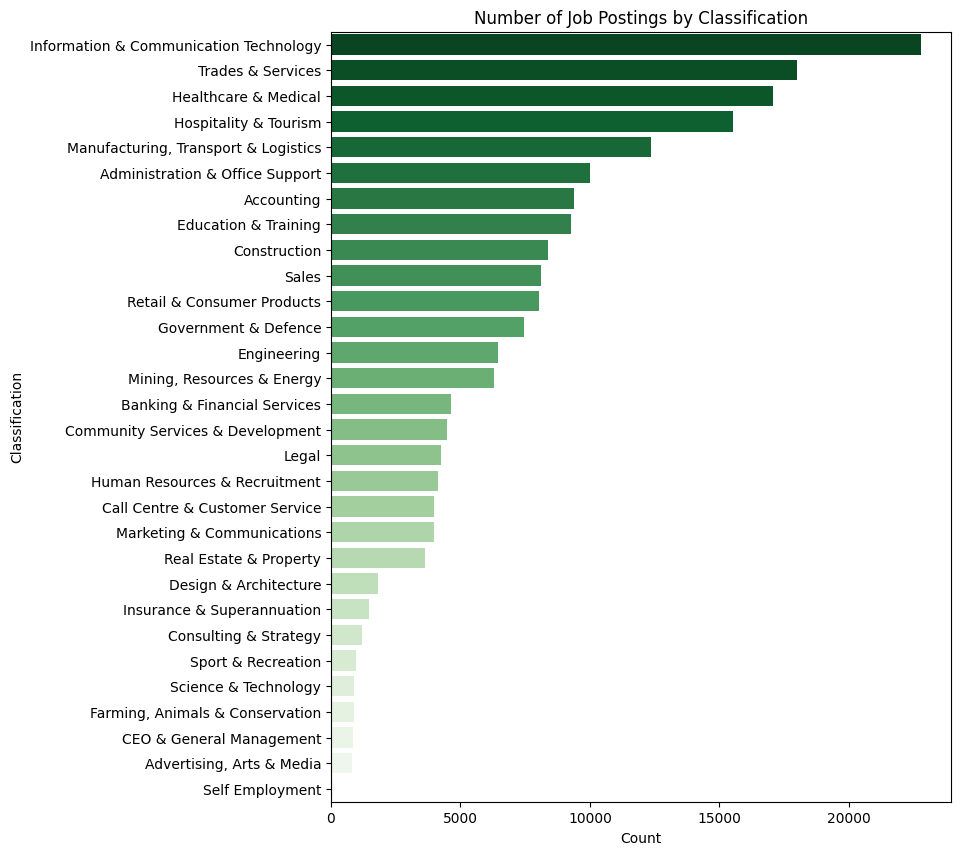

In [65]:
classificationDf = df[df['Classification'].isna()==False]
classificationDf = classificationDf.groupby('Classification').count()
classificationDf['Classification'] = classificationDf.index
classificationDf['Count'] = classificationDf["Id"]
classificationDf.sort_values("Count", ascending=False, inplace=True)
plt.figure(figsize=(8,10))
sns.barplot(data=classificationDf, x="Count", y="Classification", palette="Greens_r")
plt.title("Number of Job Postings by Classification")
plt.show()

### Find the main spotlight sub-sectors in each sector (1 mark)

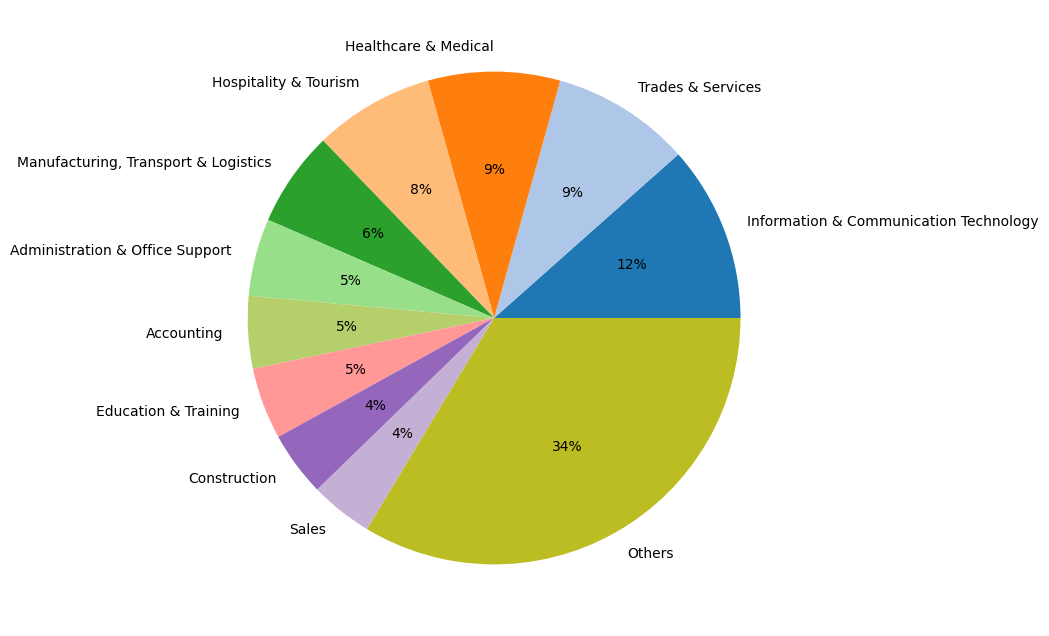

In [70]:
# Pie char for job market share of classifications
from matplotlib import cm

df_pie = df['Classification'].groupby(df['Classification'])

df_pie = df_pie.count().sort_values(ascending=False).to_frame()
df_pie['Value'] = df_pie["Classification"]
df_pie['Classification'] = df_pie.index
df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_pie["Value"][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']

plt.figure(figsize=(8,8))
plt.pie(df2["Value"], labels=df2["Classification"], colors=colors, autopct="%.0f%%")
plt.show()

### Visualize the salary range in the sectors/sub-sectors (1 mark)

C:\Users\TP\AppData\Local\Temp\ipykernel_13352\2919073176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


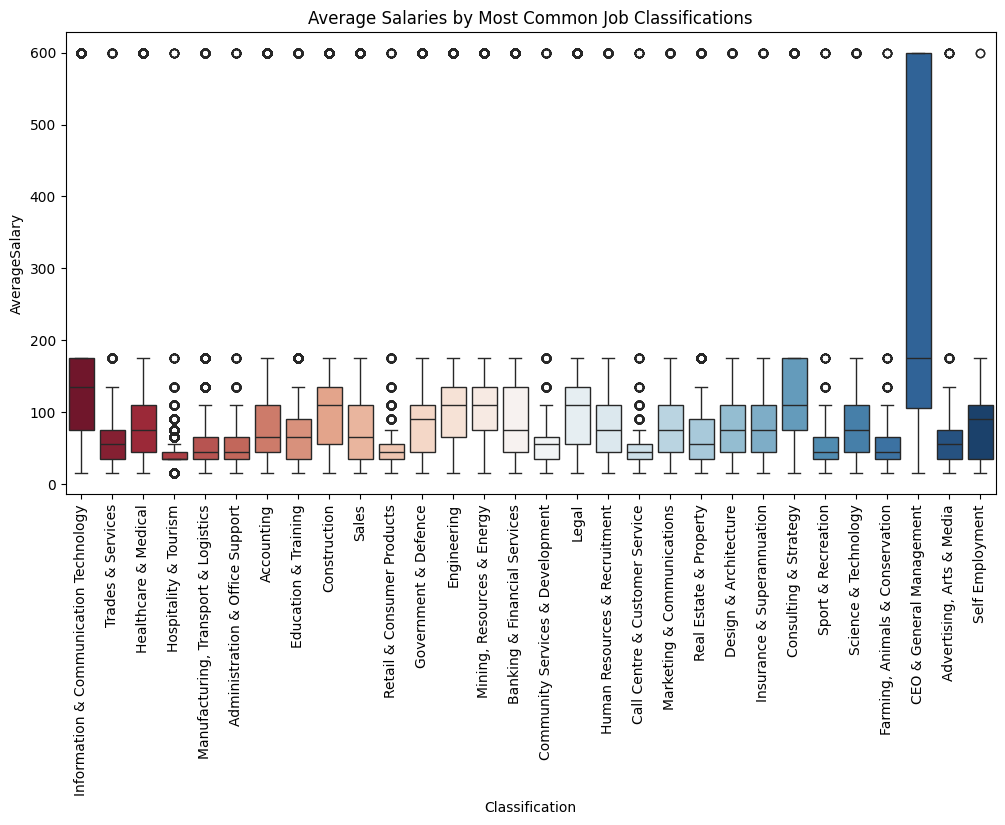

In [71]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x="Classification",
    y="AverageSalary",
    order=classificationDf["Classification"][:30],
    palette=sns.color_palette("RdBu", n_colors=30)
)
plt.title("Average Salaries by Most Common Job Classifications")
plt.xticks(rotation=90)
plt.show()


In [80]:
ictSubClassifications = df[df["Classification"] == "Information & Communication Technology"]
orderOfSubClassifications = ictSubClassifications["SubClassification"].value_counts().index

C:\Users\TP\AppData\Local\Temp\ipykernel_13352\3895883474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\TP\AppData\Local\Temp\ipykernel_13352\3895883474.py:3: UserWarning: The palette list has more values (30) than needed (22), which may not be intended.
  sns.boxplot(


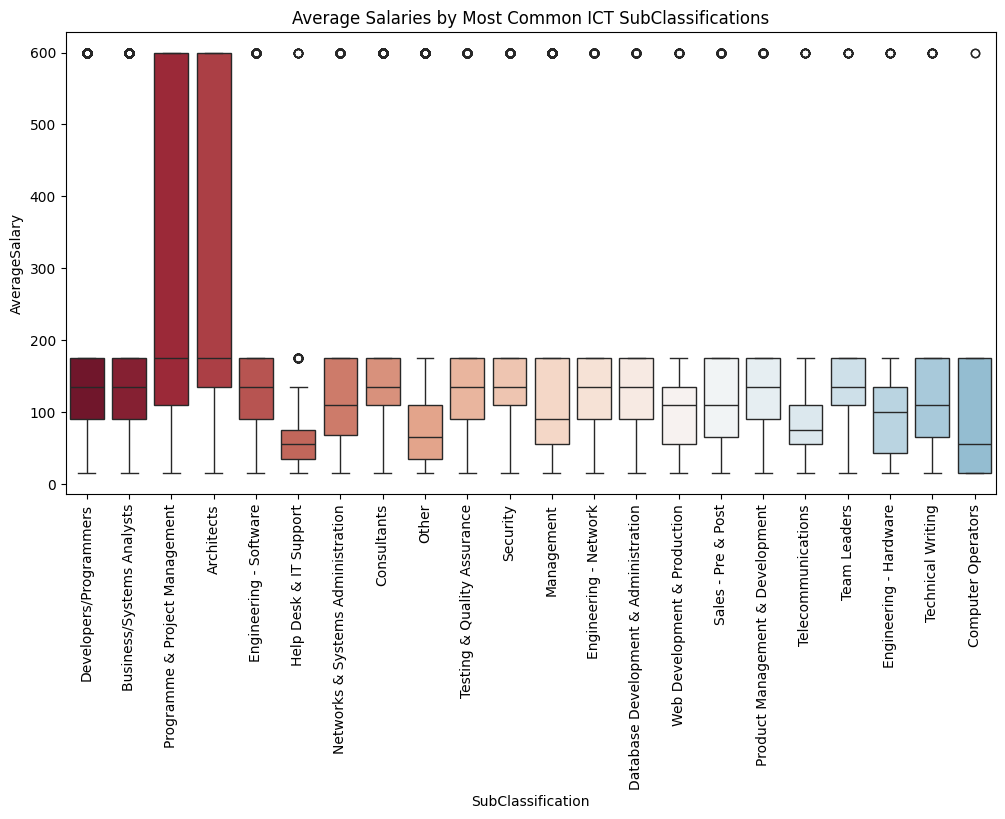

In [81]:
ictSubClassifications = df[df["Classification"] == "Information & Communication Technology"]
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x="SubClassification",
    y="AverageSalary",
    order=orderOfSubClassifications,
    palette=sns.color_palette("RdBu", n_colors=30)
)
plt.title("Average Salaries by Most Common ICT SubClassifications")
plt.xticks(rotation=90)
plt.show()
